### Import necessary Libraries


In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 112kB 1.1MB/s eta 0:00:01
Folium installed
Libraries imported.


### Loading tables from NYC Government




In [2]:
# Read csv file from an URL

from io import StringIO
import pandas as pd
import requests

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}

u1=url_poverty="https://furmancenter.org/files/NDP/poverty_rate_data.csv"
u2=url_rent='https://furmancenter.org/files/NDP/median_rent_data.csv'
u3=url_publichousing='https://furmancenter.org/files/NDP/public_housing_data.csv'
u4=url_newoccupancy='https://furmancenter.org/files/NDP/cofo_data.csv'
u5=url_crimerate='https://furmancenter.org/files/NDP/crime_rate_data.csv'

list_url=[u1,u2,u3,u4,u5]
list_table=[]
for x in list_url:
    a=requests.get(x, headers= headers).text
    b=pd.read_csv(StringIO(a), sep=",")
    c=b[b['Level']=='Community District'].reset_index(drop=True)
    list_table.append(c)



In [3]:
#Naming the table in the list
t_poverty=list_table[0]
t_rent=list_table[1]
t_publichousing=list_table[2]
t_newoccupancy=list_table[3]
t_crimerate=list_table[4]


In [4]:
# Check for NaN
print('Poverty Table, data comlumn contains NaN? Answer:',t_poverty['Poverty_Rate_2017'].isnull().values.any())
print('Rent Table, data comlumn contains NaN? Answer:',t_rent['2018'].isnull().values.any())
print('Public housing Table, data comlumn contains NaN? Answer:',t_publichousing['public_housing'].isnull().values.any())
print('New Occupancy Table, data comlumn contains NaN? Answer:',t_newoccupancy['2019'].isnull().values.any())
print('Crime Rate Table, data comlumn contains NaN? Answer:',t_crimerate['property_crime_rate'].isnull().values.any(),'and',t_crimerate['violent_crime_rate'].isnull().values.any() )

Poverty Table, data comlumn contains NaN? Answer: False
Rent Table, data comlumn contains NaN? Answer: False
Public housing Table, data comlumn contains NaN? Answer: False
New Occupancy Table, data comlumn contains NaN? Answer: False
Crime Rate Table, data comlumn contains NaN? Answer: False and False


### Loading Excel Sheet of The Demogrphic Data of The Community District

In [5]:
#Postal list of the targeting 59 districts
district_list=t_publichousing['Geography'].to_list()


In [6]:
#Loading the relevant demographic data of the 59 districts using the name in the postal list
postal_list_input=[]
for x_ndi in district_list:
    x_ndi_input=x_ndi.replace(' ','')
    postal_url='https://furmancenter.org/files/NDP/{}_NeighborhoodDataProfile.xlsx'.format(x_ndi_input)
    hdr = {'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8', "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36", "X-Requested-With": "XMLHttpRequest"} #change the version of the browser accordingly
    resp = requests.get(postal_url, headers = hdr)
    c=pd.read_excel(resp.content, '{} Data'.format(x_ndi)).iloc[[3,4,5,6,13,16,20,21,56,57,58,59,60,61],[0,1,2,3,4,8]].reset_index(drop=True)
    postal_list_input.append(c)

In [7]:
# Combine all the tables read from the for loop earlier to a raw data table
rawtable = pd.concat(postal_list_input)
rawtable


,Community District,Name,Indicator Category,Indicator,Indicator Description,2018
0,BX 01,Mott Haven/Melrose,Demographics,Population,"All people, both children and adults, living i...","164,003"
1,BX 01,Mott Haven/Melrose,Demographics,Population aged 65+,The percentage of residents who are aged 65 ye...,9.0%
2,BX 01,Mott Haven/Melrose,Demographics,Households with children under 18 years old,The percentage of households living with child...,38.7%
3,BX 01,Mott Haven/Melrose,Demographics,Single-person households,The share of households that include only one ...,34.7%
4,BX 01,Mott Haven/Melrose,Demographics,Median household income (2019$),The median household's total income of all mem...,"$26,150"
...,...,...,...,...,...,...
9,SI 03,Tottenville/Great Kills,Land Use and Development,Units authorized by new residential building p...,The number of units authorized by new resident...,304
10,SI 03,Tottenville/Great Kills,Land Use and Development,Units issued new certificates of occupancy,The number of residential units in buildings i...,300
11,SI 03,Tottenville/Great Kills,Neighborhood Services and Conditions,Car-free commute (% of commuters),The percentage of workers who commute primaril...,25.1%
12,SI 03,Tottenville/Great Kills,Neighborhood Services and Conditions,Mean travel time to work (minutes),The mean commute time in minutes for commuters...,46.9


In [8]:
#Check for NaN
print('Data comlumn contains NaN? Answer:',rawtable.isnull().values.any())


Data comlumn contains NaN? Answer: False


In [9]:
# Change the demographic indicators to columns
consolidatedtable=rawtable.pivot(index='Community District',columns="Indicator", values=2018)
consolidatedtable

Indicator,Car-free commute (% of commuters),Households with children under 18 years old,Mean travel time to work (minutes),Median household income (2019$),Population,Population aged 25+ without a high school diploma,Population aged 65+,"Population density (1,000 persons per square mile)",Poverty rate,"Serious crime rate (per 1,000 residents)",Single-person households,Unemployment rate,Units authorized by new residential building permits,Units issued new certificates of occupancy
Community District,,,,,,,,,,,,,,
BK 01,85.0%,23.9%,34.6,"$81,990","162,381",17.5%,9.4%,39.4,23.7%,13.5,27.3%,2.45%,"1,097","2,472"
BK 02,88.7%,24.7%,35.7,"$110,230","145,843",8.6%,10.1%,46.9,15.9%,21.4,35.0%,5.13%,"1,442","1,478"
BK 03,80.5%,28.3%,42.2,"$55,910","155,117",14.7%,9.9%,67.5,27.0%,17.8,30.8%,5.77%,619,856
BK 04,83.2%,23.2%,43.1,"$54,240","121,188",22.7%,8.9%,47.8,24.0%,13.4,27.4%,3.76%,449,"1,502"
BK 05,67.2%,37.9%,42.3,"$42,060","171,170",17.6%,12.2%,28.2,21.7%,17.6,32.0%,5.62%,972,104
BK 06,86.4%,29.2%,38.0,"$124,670","116,351",6.0%,11.9%,29.1,12.3%,9.7,29.6%,5.51%,120,229
BK 07,80.4%,38.5%,42.8,"$63,490","132,875",32.5%,11.0%,33.1,17.1%,8.6,21.7%,5.30%,145,160
BK 08,84.2%,26.7%,41.8,"$66,590","136,367",15.4%,12.3%,61.4,19.0%,11.5,33.5%,5.46%,158,517
BK 09,80.2%,25.2%,44.5,"$63,370","111,448",12.1%,14.4%,65.2,15.3%,12.1,33.4%,4.72%,114,388


In [11]:
#Check the colums in the table
consolidatedtable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, BK 01 to SI 03
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Car-free commute (% of commuters)                     59 non-null     object
 1   Households with children under 18 years old           59 non-null     object
 2   Mean travel time to work (minutes)                    59 non-null     object
 3   Median household income (2019$)                       59 non-null     object
 4   Population                                            59 non-null     object
 5   Population aged 25+ without a high school diploma     59 non-null     object
 6   Population aged 65+                                   59 non-null     object
 7   Population density (1,000 persons per square mile)    59 non-null     object
 8   Poverty rate                                          59 non-null     

### Preprocessing The Data for Analysis


In [10]:
# Preprocessing the table and make some of the columns become numeric for analysis
char=['%',',']
consolidatedtable_processed = consolidatedtable.replace(char,'', regex=True)
#df=df.replace('\*','',regex=True).astype(float)
consolidatedtable_processed['Median household income (2019$)'] = consolidatedtable_processed['Median household income (2019$)'].str.replace('$', '')
consolidatedtable_processed = consolidatedtable_processed.apply(pd.to_numeric, errors='coerce')

print(consolidatedtable_processed.info())
consolidatedtable_processed

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, BK 01 to SI 03
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Car-free commute (% of commuters)                     59 non-null     float64
 1   Households with children under 18 years old           59 non-null     float64
 2   Mean travel time to work (minutes)                    59 non-null     float64
 3   Median household income (2019$)                       59 non-null     int64  
 4   Population                                            59 non-null     int64  
 5   Population aged 25+ without a high school diploma     59 non-null     float64
 6   Population aged 65+                                   59 non-null     float64
 7   Population density (1,000 persons per square mile)    59 non-null     float64
 8   Poverty rate                                          59 non

Indicator,Car-free commute (% of commuters),Households with children under 18 years old,Mean travel time to work (minutes),Median household income (2019$),Population,Population aged 25+ without a high school diploma,Population aged 65+,"Population density (1,000 persons per square mile)",Poverty rate,"Serious crime rate (per 1,000 residents)",Single-person households,Unemployment rate,Units authorized by new residential building permits,Units issued new certificates of occupancy
Community District,,,,,,,,,,,,,,
BK 01,85.0,23.9,34.6,81990,162381,17.5,9.4,39.4,23.7,13.5,27.3,2.45,1097,2472
BK 02,88.7,24.7,35.7,110230,145843,8.6,10.1,46.9,15.9,21.4,35.0,5.13,1442,1478
BK 03,80.5,28.3,42.2,55910,155117,14.7,9.9,67.5,27.0,17.8,30.8,5.77,619,856
BK 04,83.2,23.2,43.1,54240,121188,22.7,8.9,47.8,24.0,13.4,27.4,3.76,449,1502
BK 05,67.2,37.9,42.3,42060,171170,17.6,12.2,28.2,21.7,17.6,32.0,5.62,972,104
BK 06,86.4,29.2,38.0,124670,116351,6.0,11.9,29.1,12.3,9.7,29.6,5.51,120,229
BK 07,80.4,38.5,42.8,63490,132875,32.5,11.0,33.1,17.1,8.6,21.7,5.30,145,160
BK 08,84.2,26.7,41.8,66590,136367,15.4,12.3,61.4,19.0,11.5,33.5,5.46,158,517
BK 09,80.2,25.2,44.5,63370,111448,12.1,14.4,65.2,15.3,12.1,33.4,4.72,114,388


### Choosing The Best K For Clustering Using Elbow Law

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()



distortions = []
K = range(1,59)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(consolidatedtable_processed)
    distortions.append(kmeanModel.inertia_)

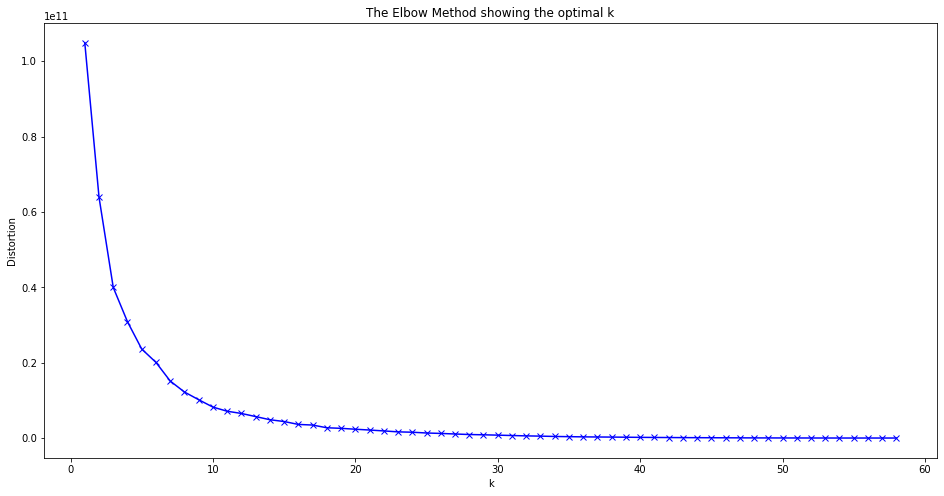

In [15]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
#Using K=3 to cluster the district
kmeans = KMeans(n_clusters=3, random_state=0).fit(consolidatedtable_processed)


In [13]:
# Insert the cluster label (cluster result) to the dataframe
consolidatedtable_processed.insert(0, 'Cluster Labels', kmeans.labels_)

In [14]:
#Cleaning the dataframe
consolidatedtable_processed['Name'] = consolidatedtable_processed.index
rawtable.drop(rawtable.iloc[:, 3:6], inplace = True, axis = 1)

In [15]:
consolidatedtable_processed

Indicator,Cluster Labels,Car-free commute (% of commuters),Households with children under 18 years old,Mean travel time to work (minutes),Median household income (2019$),Population,Population aged 25+ without a high school diploma,Population aged 65+,"Population density (1,000 persons per square mile)",Poverty rate,"Serious crime rate (per 1,000 residents)",Single-person households,Unemployment rate,Units authorized by new residential building permits,Units issued new certificates of occupancy,Name
Community District,,,,,,,,,,,,,,,,
BK 01,0,85.0,23.9,34.6,81990,162381,17.5,9.4,39.4,23.7,13.5,27.3,2.45,1097,2472,BK 01
BK 02,0,88.7,24.7,35.7,110230,145843,8.6,10.1,46.9,15.9,21.4,35.0,5.13,1442,1478,BK 02
BK 03,2,80.5,28.3,42.2,55910,155117,14.7,9.9,67.5,27.0,17.8,30.8,5.77,619,856,BK 03
BK 04,2,83.2,23.2,43.1,54240,121188,22.7,8.9,47.8,24.0,13.4,27.4,3.76,449,1502,BK 04
BK 05,1,67.2,37.9,42.3,42060,171170,17.6,12.2,28.2,21.7,17.6,32.0,5.62,972,104,BK 05
BK 06,0,86.4,29.2,38.0,124670,116351,6.0,11.9,29.1,12.3,9.7,29.6,5.51,120,229,BK 06
BK 07,2,80.4,38.5,42.8,63490,132875,32.5,11.0,33.1,17.1,8.6,21.7,5.30,145,160,BK 07
BK 08,2,84.2,26.7,41.8,66590,136367,15.4,12.3,61.4,19.0,11.5,33.5,5.46,158,517,BK 08
BK 09,2,80.2,25.2,44.5,63370,111448,12.1,14.4,65.2,15.3,12.1,33.4,4.72,114,388,BK 09


### Loading Neighborhood's Geospatial Data Using Four Sqaure



In [16]:
# Neighborhoods
Neighborhood_geo = pd.read_excel ('https://github.com/Yu-Hung-Chen/Coursera_Capstone/blob/main/Geospatial%20Data%20NY.xlsx?raw=true')
Neighborhood_geo=Neighborhood_geo.drop(columns={'Unnamed: 0'})
Neighborhood_geo


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631


In [17]:
# Extracting neighborhoods' data for later use
NLD=Neighborhood_geo.groupby('Neighborhood').mean()
NLD

,Latitude,Longitude
Neighborhood,,
Allerton,40.865788,-73.859319
Annadale,40.538114,-74.178549
Arden Heights,40.549286,-74.185887
Arlington,40.635325,-74.165104
Arrochar,40.596313,-74.067124
...,...,...
Woodhaven,40.689887,-73.858110
Woodlawn,40.898273,-73.867315
Woodrow,40.541968,-74.205246


In [18]:
# Venues of the neighborhoods
Venue_geo =pd.read_excel ('https://github.com/Yu-Hung-Chen/Coursera_Capstone/blob/main/Geospatial%20Data%20Coffee%20Venue%20NY.xlsx?raw=true')
Venue_geo


,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop
1,1,Co-op City,40.874294,-73.829939,Dunkin',40.869812,-73.829473,Donut Shop
2,2,Eastchester,40.887556,-73.827806,Dunkin',40.885384,-73.828099,Donut Shop
3,3,Kingsbridge,40.881687,-73.902818,Mon Amour Coffee & Wine,40.885009,-73.900332,Coffee Shop
4,4,Kingsbridge,40.881687,-73.902818,Dunkin',40.879308,-73.905066,Donut Shop
...,...,...,...,...,...,...,...,...
2329,2329,Hudson Yards,40.756658,-74.000111,Matchaful,40.752918,-74.000222,Tea Room
2330,2330,Hudson Yards,40.756658,-74.000111,Pier Cafe,40.759625,-74.004162,Café
2331,2331,Hudson Yards,40.756658,-74.000111,Granja,40.752507,-74.001879,Coffee Shop
2332,2332,Hammels,40.587338,-73.805530,Smoothie Haven,40.590802,-73.802826,Smoothie Shop


### Data Preprocessing For The Combination of The Venue Data and Demographic Data

In [19]:
#Creat a mapping table between the demographic data and venue data
from pandas import DataFrame

postaltable = DataFrame(t_publichousing.Name.str.split('/').tolist(), index=t_publichousing.Geography).stack()
postaltable = postaltable.reset_index()[[0, 'Geography']] # var1 variable is currently labeled 0
postaltable.columns = ['Geography Name', 'Geography'] # renaming var1

In [20]:
postaltable

,Geography Name,Geography
0,Mott Haven,BX 01
1,Melrose,BX 01
2,Hunts Point,BX 02
3,Longwood,BX 02
4,Morrisania,BX 03
...,...,...
95,Stapleton,SI 01
96,South Beach,SI 02
97,Willowbrook,SI 02
98,Tottenville,SI 03


In [21]:
#Get the location of the district based on the neighborhoods it has
postaltable1=pd.merge(NLD,postaltable, how='left', left_on=['Neighborhood'], right_on=['Geography Name'])
postaltable1=postaltable1.dropna()
district_table=postaltable1.groupby('Geography').mean()
district_table

,Latitude,Longitude
Geography,,
BK 01,40.718673,-73.956178
BK 02,40.692195,-73.983344
BK 03,40.687232,-73.941785
BK 04,40.698116,-73.925258
BK 05,40.658757,-73.880034
BK 06,40.676430,-73.985852
BK 07,40.645103,-74.010316
BK 08,40.673826,-73.954075
BK 10,40.622510,-74.024967


In [22]:
# Add the district to the venue table
nv=pd.merge(Venue_geo,postaltable, how='left', left_on=['Neighborhood'], right_on=['Geography Name'])
nv=nv.dropna()
nv

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Geography Name,Geography
1,1,Co-op City,40.874294,-73.829939,Dunkin',40.869812,-73.829473,Donut Shop,Co-op City,BX 10
23,23,Williamsbridge,40.881039,-73.857446,Og's Cafe,40.880441,-73.857435,Coffee Shop,Williamsbridge,BX 12
24,24,Baychester,40.866858,-73.835798,Dunkin',40.867800,-73.833365,Donut Shop,Baychester,BX 12
25,25,Baychester,40.866858,-73.835798,Dunkin',40.863212,-73.834300,Donut Shop,Baychester,BX 12
34,34,University Heights,40.855727,-73.910416,Dunkin',40.853669,-73.908844,Donut Shop,University Heights,BX 05
...,...,...,...,...,...,...,...,...,...,...
2298,2298,Kingsbridge Heights,40.870392,-73.901523,Perista,40.868303,-73.901349,Coffee Shop,Kingsbridge Heights,BX 07
2299,2299,Kingsbridge Heights,40.870392,-73.901523,Starbucks,40.867150,-73.904088,Coffee Shop,Kingsbridge Heights,BX 07
2300,2300,Kingsbridge Heights,40.870392,-73.901523,JH Café,40.868210,-73.902124,Café,Kingsbridge Heights,BX 07
2301,2301,Kingsbridge Heights,40.870392,-73.901523,Carman Cafe,40.871159,-73.896762,Café,Kingsbridge Heights,BX 07


In [23]:
#Adding the location of the district to the table
nvv=pd.merge(nv,district_table, how='left', left_on=['Geography'], right_on=['Geography'])
nvv

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Geography Name,Geography,Latitude,Longitude
0,1,Co-op City,40.874294,-73.829939,Dunkin',40.869812,-73.829473,Donut Shop,Co-op City,BX 10,40.844702,-73.823145
1,23,Williamsbridge,40.881039,-73.857446,Og's Cafe,40.880441,-73.857435,Coffee Shop,Williamsbridge,BX 12,40.873948,-73.846622
2,24,Baychester,40.866858,-73.835798,Dunkin',40.867800,-73.833365,Donut Shop,Baychester,BX 12,40.873948,-73.846622
3,25,Baychester,40.866858,-73.835798,Dunkin',40.863212,-73.834300,Donut Shop,Baychester,BX 12,40.873948,-73.846622
4,34,University Heights,40.855727,-73.910416,Dunkin',40.853669,-73.908844,Donut Shop,University Heights,BX 05,40.858362,-73.903421
...,...,...,...,...,...,...,...,...,...,...,...,...
993,2298,Kingsbridge Heights,40.870392,-73.901523,Perista,40.868303,-73.901349,Coffee Shop,Kingsbridge Heights,BX 07,40.870392,-73.901523
994,2299,Kingsbridge Heights,40.870392,-73.901523,Starbucks,40.867150,-73.904088,Coffee Shop,Kingsbridge Heights,BX 07,40.870392,-73.901523
995,2300,Kingsbridge Heights,40.870392,-73.901523,JH Café,40.868210,-73.902124,Café,Kingsbridge Heights,BX 07,40.870392,-73.901523
996,2301,Kingsbridge Heights,40.870392,-73.901523,Carman Cafe,40.871159,-73.896762,Café,Kingsbridge Heights,BX 07,40.870392,-73.901523


In [24]:
#Check the number of the coffee shop by district
xu=nvv.groupby(['Geography']).size()
xu

Geography
BK 01     32
BK 02     23
BK 03      8
BK 04     13
BK 05      1
BK 06     36
BK 07      5
BK 08     23
BK 10     11
BK 11      4
BK 12      6
BK 13      2
BK 14     10
BK 15      4
BK 16      1
BK 18      2
BX 01      8
BX 02      4
BX 03      4
BX 04      3
BX 05     12
BX 06     12
BX 07      5
BX 09      1
BX 10      3
BX 11      5
BX 12      3
MN 01     78
MN 02    115
MN 03     84
MN 04     79
MN 05    100
MN 06     43
MN 07     26
MN 08     23
MN 09     28
MN 10      7
MN 11     11
MN 12     27
QN 01     18
QN 02     22
QN 03      7
QN 04     16
QN 05      8
QN 06     10
QN 07     11
QN 08      7
QN 09      6
QN 10      6
QN 11     14
QN 13      1
QN 14      1
SI 01      9
dtype: int64

In [25]:
#Make it a dataframe
xp=xu.reset_index()
xp.columns=['Geography', 'Number of coffee shop']
xp

,Geography,Number of coffee shop
0,BK 01,32
1,BK 02,23
2,BK 03,8
3,BK 04,13
4,BK 05,1
5,BK 06,36
6,BK 07,5
7,BK 08,23
8,BK 10,11
9,BK 11,4


In [27]:
#Add the number of coffee shop to the dataframe
xpp=pd.merge(xp,nvv, how='left', left_on=['Geography'], right_on=['Geography'])
xpp.drop(columns={'Unnamed: 0'})

,Geography,Number of coffee shop,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Geography Name,Latitude,Longitude
0,BK 01,32,Greenpoint,40.730201,-73.954241,Early,40.732069,-73.954721,Café,Greenpoint,40.718673,-73.956178
1,BK 01,32,Greenpoint,40.730201,-73.954241,Cafe Riviera,40.728514,-73.953477,Café,Greenpoint,40.718673,-73.956178
2,BK 01,32,Greenpoint,40.730201,-73.954241,Homecoming,40.729696,-73.957525,Coffee Shop,Greenpoint,40.718673,-73.956178
3,BK 01,32,Greenpoint,40.730201,-73.954241,Pueblo Querido Coffee Roasters,40.730526,-73.951822,Coffee Shop,Greenpoint,40.718673,-73.956178
4,BK 01,32,Greenpoint,40.730201,-73.954241,Maman,40.730446,-73.958133,Coffee Shop,Greenpoint,40.718673,-73.956178
...,...,...,...,...,...,...,...,...,...,...,...,...
993,SI 01,9,Stapleton,40.626928,-74.077902,Vida,40.628723,-74.079802,Restaurant,Stapleton,40.635955,-74.078628
994,SI 01,9,Stapleton,40.626928,-74.077902,Best Coffee Shop,40.627164,-74.077948,Coffee Shop,Stapleton,40.635955,-74.078628
995,SI 01,9,Stapleton,40.626928,-74.077902,The Corner Grind,40.629517,-74.076790,Café,Stapleton,40.635955,-74.078628
996,SI 01,9,Stapleton,40.626928,-74.077902,Coperaco,40.628944,-74.074180,Coffee Shop,Stapleton,40.635955,-74.078628


### Analyzing The Data Using The Vnue and Demographic Data

In [28]:
#Combine the venue table with the demographic table
consolidation=pd.merge(xpp,consolidatedtable_processed, how='left', left_on=['Geography'], right_on=['Name'])

consolidation['Number of coffee shop'] = consolidation['Number of coffee shop'].fillna(0)
consolidation.drop(columns=['Geography'],inplace=True)
consolidation.rename(columns={'Name': 'Community'})

,Number of coffee shop,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Geography Name,...,Population aged 25+ without a high school diploma,Population aged 65+,"Population density (1,000 persons per square mile)",Poverty rate,"Serious crime rate (per 1,000 residents)",Single-person households,Unemployment rate,Units authorized by new residential building permits,Units issued new certificates of occupancy,Community
0,32,141,Greenpoint,40.730201,-73.954241,Early,40.732069,-73.954721,Café,Greenpoint,...,17.5,9.4,39.4,23.7,13.5,27.3,2.45,1097,2472,BK 01
1,32,142,Greenpoint,40.730201,-73.954241,Cafe Riviera,40.728514,-73.953477,Café,Greenpoint,...,17.5,9.4,39.4,23.7,13.5,27.3,2.45,1097,2472,BK 01
2,32,143,Greenpoint,40.730201,-73.954241,Homecoming,40.729696,-73.957525,Coffee Shop,Greenpoint,...,17.5,9.4,39.4,23.7,13.5,27.3,2.45,1097,2472,BK 01
3,32,144,Greenpoint,40.730201,-73.954241,Pueblo Querido Coffee Roasters,40.730526,-73.951822,Coffee Shop,Greenpoint,...,17.5,9.4,39.4,23.7,13.5,27.3,2.45,1097,2472,BK 01
4,32,145,Greenpoint,40.730201,-73.954241,Maman,40.730446,-73.958133,Coffee Shop,Greenpoint,...,17.5,9.4,39.4,23.7,13.5,27.3,2.45,1097,2472,BK 01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,9,1776,Stapleton,40.626928,-74.077902,Vida,40.628723,-74.079802,Restaurant,Stapleton,...,17.9,13.8,12.8,17.0,8.0,29.4,5.52,135,158,SI 01
994,9,1777,Stapleton,40.626928,-74.077902,Best Coffee Shop,40.627164,-74.077948,Coffee Shop,Stapleton,...,17.9,13.8,12.8,17.0,8.0,29.4,5.52,135,158,SI 01
995,9,1778,Stapleton,40.626928,-74.077902,The Corner Grind,40.629517,-74.076790,Café,Stapleton,...,17.9,13.8,12.8,17.0,8.0,29.4,5.52,135,158,SI 01
996,9,1779,Stapleton,40.626928,-74.077902,Coperaco,40.628944,-74.074180,Coffee Shop,Stapleton,...,17.9,13.8,12.8,17.0,8.0,29.4,5.52,135,158,SI 01


In [29]:
# Get the average number of coffee shop in each cluster
avg_table=consolidation.groupby('Cluster Labels')['Number of coffee shop'].mean().reset_index()
avg_table

,Cluster Labels,Number of coffee shop
0,0,74.557554
1,1,12.904762
2,2,31.836795


In [30]:
# Filter out the district, in which the number of coffee shop is below average of the cluster group
target_table=consolidation.loc[((consolidation['Cluster Labels'] == 0) & (consolidation['Number of coffee shop'] <= 74.6))|((consolidation['Cluster Labels'] == 1) & (consolidation['Number of coffee shop'] <= 12.9))|((consolidation['Cluster Labels'] == 2) & (consolidation['Number of coffee shop'] <= 31.8))]
target_table=target_table.reset_index(drop=True)
target_table

,Number of coffee shop,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Geography Name,...,Population aged 25+ without a high school diploma,Population aged 65+,"Population density (1,000 persons per square mile)",Poverty rate,"Serious crime rate (per 1,000 residents)",Single-person households,Unemployment rate,Units authorized by new residential building permits,Units issued new certificates of occupancy,Name
0,32,141,Greenpoint,40.730201,-73.954241,Early,40.732069,-73.954721,Café,Greenpoint,...,17.5,9.4,39.4,23.7,13.5,27.3,2.45,1097,2472,BK 01
1,32,142,Greenpoint,40.730201,-73.954241,Cafe Riviera,40.728514,-73.953477,Café,Greenpoint,...,17.5,9.4,39.4,23.7,13.5,27.3,2.45,1097,2472,BK 01
2,32,143,Greenpoint,40.730201,-73.954241,Homecoming,40.729696,-73.957525,Coffee Shop,Greenpoint,...,17.5,9.4,39.4,23.7,13.5,27.3,2.45,1097,2472,BK 01
3,32,144,Greenpoint,40.730201,-73.954241,Pueblo Querido Coffee Roasters,40.730526,-73.951822,Coffee Shop,Greenpoint,...,17.5,9.4,39.4,23.7,13.5,27.3,2.45,1097,2472,BK 01
4,32,145,Greenpoint,40.730201,-73.954241,Maman,40.730446,-73.958133,Coffee Shop,Greenpoint,...,17.5,9.4,39.4,23.7,13.5,27.3,2.45,1097,2472,BK 01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,9,1776,Stapleton,40.626928,-74.077902,Vida,40.628723,-74.079802,Restaurant,Stapleton,...,17.9,13.8,12.8,17.0,8.0,29.4,5.52,135,158,SI 01
511,9,1777,Stapleton,40.626928,-74.077902,Best Coffee Shop,40.627164,-74.077948,Coffee Shop,Stapleton,...,17.9,13.8,12.8,17.0,8.0,29.4,5.52,135,158,SI 01
512,9,1778,Stapleton,40.626928,-74.077902,The Corner Grind,40.629517,-74.076790,Café,Stapleton,...,17.9,13.8,12.8,17.0,8.0,29.4,5.52,135,158,SI 01
513,9,1779,Stapleton,40.626928,-74.077902,Coperaco,40.628944,-74.074180,Coffee Shop,Stapleton,...,17.9,13.8,12.8,17.0,8.0,29.4,5.52,135,158,SI 01


### Market Potential Based on Population and Population Density



In [31]:
# Ranking the districts based on population and population density
# Sum up the two ranking as the final ranking for market potential
consolidation['Population Rank']=consolidation['Population'].rank(method='dense',ascending=True)
consolidation['Population Demsity Rank']=consolidation['Population density (1,000 persons per square mile)'].rank(method='dense',ascending=True)
consolidation['sum_Rank']=consolidation['Population Rank']+consolidation['Population Demsity Rank']

In [32]:
consolidation

,Number of coffee shop,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Geography Name,...,Poverty rate,"Serious crime rate (per 1,000 residents)",Single-person households,Unemployment rate,Units authorized by new residential building permits,Units issued new certificates of occupancy,Name,Population Rank,Population Demsity Rank,sum_Rank
0,32,141,Greenpoint,40.730201,-73.954241,Early,40.732069,-73.954721,Café,Greenpoint,...,23.7,13.5,27.3,2.45,1097,2472,BK 01,33.0,22.0,55.0
1,32,142,Greenpoint,40.730201,-73.954241,Cafe Riviera,40.728514,-73.953477,Café,Greenpoint,...,23.7,13.5,27.3,2.45,1097,2472,BK 01,33.0,22.0,55.0
2,32,143,Greenpoint,40.730201,-73.954241,Homecoming,40.729696,-73.957525,Coffee Shop,Greenpoint,...,23.7,13.5,27.3,2.45,1097,2472,BK 01,33.0,22.0,55.0
3,32,144,Greenpoint,40.730201,-73.954241,Pueblo Querido Coffee Roasters,40.730526,-73.951822,Coffee Shop,Greenpoint,...,23.7,13.5,27.3,2.45,1097,2472,BK 01,33.0,22.0,55.0
4,32,145,Greenpoint,40.730201,-73.954241,Maman,40.730446,-73.958133,Coffee Shop,Greenpoint,...,23.7,13.5,27.3,2.45,1097,2472,BK 01,33.0,22.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,9,1776,Stapleton,40.626928,-74.077902,Vida,40.628723,-74.079802,Restaurant,Stapleton,...,17.0,8.0,29.4,5.52,135,158,SI 01,38.0,4.0,42.0
994,9,1777,Stapleton,40.626928,-74.077902,Best Coffee Shop,40.627164,-74.077948,Coffee Shop,Stapleton,...,17.0,8.0,29.4,5.52,135,158,SI 01,38.0,4.0,42.0
995,9,1778,Stapleton,40.626928,-74.077902,The Corner Grind,40.629517,-74.076790,Café,Stapleton,...,17.0,8.0,29.4,5.52,135,158,SI 01,38.0,4.0,42.0
996,9,1779,Stapleton,40.626928,-74.077902,Coperaco,40.628944,-74.074180,Coffee Shop,Stapleton,...,17.0,8.0,29.4,5.52,135,158,SI 01,38.0,4.0,42.0


### Estimating The Cost of Renting The Space for a Coffee Shop (Using The Median of Rent in 2018)

In [33]:
rent_table=t_rent[['Geography','2018']]
char=['%',',']
rent_table = rent_table.replace(char,'', regex=True)
rent_table['2018'] = rent_table['2018'].str.replace('$', '')
rent_table ['2018']= rent_table['2018'].apply(pd.to_numeric, errors='coerce')


In [34]:
rent_table

,Geography,2018
0,BX 01,940
1,BX 02,940
2,BX 03,1060
3,BX 04,1190
4,BX 05,1180
5,BX 06,1060
6,BX 07,1290
7,BX 08,1410
8,BX 09,1220
9,BX 10,1190


In [35]:
#Merge the rent info to the table
Graph_table=pd.merge(consolidation,rent_table, how='left', left_on=['Name'], right_on=['Geography'])
Graph_table

,Number of coffee shop,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Geography Name,...,Single-person households,Unemployment rate,Units authorized by new residential building permits,Units issued new certificates of occupancy,Name,Population Rank,Population Demsity Rank,sum_Rank,Geography,2018
0,32,141,Greenpoint,40.730201,-73.954241,Early,40.732069,-73.954721,Café,Greenpoint,...,27.3,2.45,1097,2472,BK 01,33.0,22.0,55.0,BK 01,1880
1,32,142,Greenpoint,40.730201,-73.954241,Cafe Riviera,40.728514,-73.953477,Café,Greenpoint,...,27.3,2.45,1097,2472,BK 01,33.0,22.0,55.0,BK 01,1880
2,32,143,Greenpoint,40.730201,-73.954241,Homecoming,40.729696,-73.957525,Coffee Shop,Greenpoint,...,27.3,2.45,1097,2472,BK 01,33.0,22.0,55.0,BK 01,1880
3,32,144,Greenpoint,40.730201,-73.954241,Pueblo Querido Coffee Roasters,40.730526,-73.951822,Coffee Shop,Greenpoint,...,27.3,2.45,1097,2472,BK 01,33.0,22.0,55.0,BK 01,1880
4,32,145,Greenpoint,40.730201,-73.954241,Maman,40.730446,-73.958133,Coffee Shop,Greenpoint,...,27.3,2.45,1097,2472,BK 01,33.0,22.0,55.0,BK 01,1880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,9,1776,Stapleton,40.626928,-74.077902,Vida,40.628723,-74.079802,Restaurant,Stapleton,...,29.4,5.52,135,158,SI 01,38.0,4.0,42.0,SI 01,1260
994,9,1777,Stapleton,40.626928,-74.077902,Best Coffee Shop,40.627164,-74.077948,Coffee Shop,Stapleton,...,29.4,5.52,135,158,SI 01,38.0,4.0,42.0,SI 01,1260
995,9,1778,Stapleton,40.626928,-74.077902,The Corner Grind,40.629517,-74.076790,Café,Stapleton,...,29.4,5.52,135,158,SI 01,38.0,4.0,42.0,SI 01,1260
996,9,1779,Stapleton,40.626928,-74.077902,Coperaco,40.628944,-74.074180,Coffee Shop,Stapleton,...,29.4,5.52,135,158,SI 01,38.0,4.0,42.0,SI 01,1260


In [36]:
#Create the table for visualization
Graph_table['2018 Rent Rank']=Graph_table['2018'].rank(method='dense',ascending=True)
Graph_table['Profitability Index']=Graph_table['sum_Rank']-Graph_table['2018 Rent Rank']
Graph_table_plot = Graph_table[['Name', 'Profitability Index']].drop_duplicates()

#Graphtable_table_plot=Graph_table.drop_duplicates(how='all', columns=['Name', 'Profitability Index'])
Graph_table_plot.sort_values(by='Profitability Index',ascending=False,inplace=True)

### Visualizing The Result

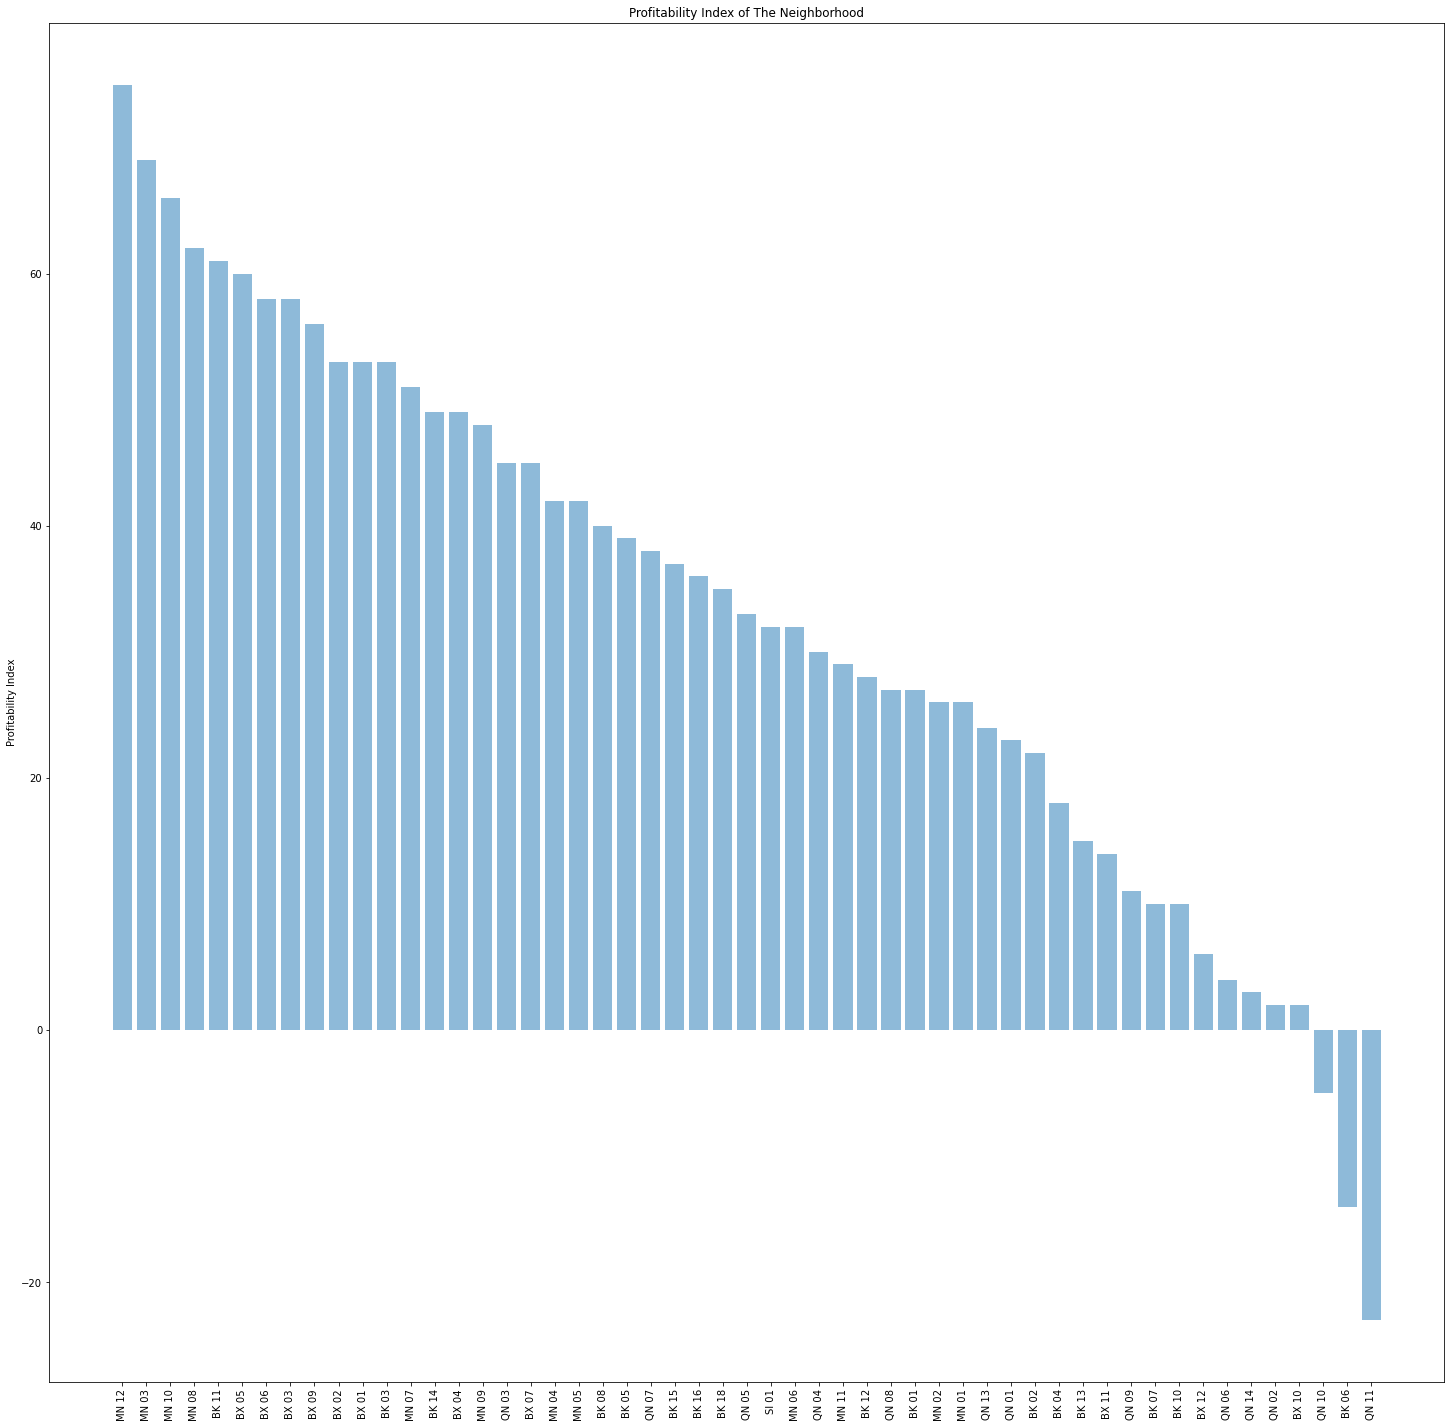

In [37]:
#Visualize the potential using column chart
import matplotlib.pyplot as plt
import numpy as np
x_pos = np.arange(len(Graph_table_plot['Name']))

plt.figure(figsize=(25,25))
plt.bar(x_pos,Graph_table_plot['Profitability Index'],align='center', alpha=0.5)
plt.title('Profitability Index of The Neighborhood')
plt.xticks(x_pos, Graph_table_plot['Name'],rotation='vertical')
plt.ylabel('Profitability Index')
plt.show()



In [38]:
#Visualizing using map combined with heat map
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [39]:
from folium.plugins import HeatMap
base_map = generateBaseMap()
HeatMap(data=Graph_table[['Latitude', 'Longitude', 'Profitability Index']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)


In [40]:
base_map